# Data Mining Techniques for Analysis of Covid-19 Discussion on Twitter 

INFO 634 Data Mining 

Group 3 Final Project Code File

Team Members: 

Aditi Salunkhe, aps342@drexel.edu

Colleen Mangold, ctm85@drexel.edu

Karthik Narasimhan, kn568@drexel.edu

Nick Babcock, nb987@drexel.edu

In [ ]:
import re
import pandas as pd
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/COVID 19 misinformation train data with labels.csv')

In [ ]:
test_df = pd.read_csv('/content/drive/MyDrive/COVID19 misinformation test data with labels.csv')

In [ ]:
df = train_df.append(test_df, ignore_index=True)

<ipython-input-5-62aee72544a6>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = train_df.append(test_df, ignore_index=True)


In [ ]:
df.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [ ]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [ ]:
df['new_tweet'] = df['tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['new_tweet'].head()

0    the cdc currently reports 99031 deaths. in gen...
1    states reported 1121 deaths a small rise from ...
2    politically correct woman (almost) uses pandem...
3    #indiafightscorona: we have 1524 #covid testin...
4    populous states can generate large case counts...
Name: new_tweet, dtype: object

In [ ]:
df['new_tweet'] = df['new_tweet'].str.replace('[^\w\s]','')
df['new_tweet'].head()

<ipython-input-8-0237dd9db09e>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['new_tweet'] = df['new_tweet'].str.replace('[^\w\s]','')


0    the cdc currently reports 99031 deaths in gene...
1    states reported 1121 deaths a small rise from ...
2    politically correct woman almost uses pandemic...
3    indiafightscorona we have 1524 covid testing l...
4    populous states can generate large case counts...
Name: new_tweet, dtype: object

In [ ]:
stop = stopwords.words('english')
df['new_tweet'] = df['new_tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [ ]:
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
df['new_tweet']= df['new_tweet'].apply(space)
df.head(20)

,id,tweet,label,new_tweet
0,1,The CDC currently reports 99031 deaths. In gen...,real,cdc currently report 99031 death general discr...
1,2,States reported 1121 deaths a small rise from ...,real,state report 1121 death small rise last tuesda...
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake,politically correct woman almost use pandemic ...
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real,indiafightscorona 1524 covid testing laborator...
4,5,Populous states can generate large case counts...,real,populous state generate large case count look ...
5,6,"Covid Act Now found ""on average each person in...",real,covid act find average person illinois covid19...
6,7,If you tested positive for #COVID19 and have n...,real,test positive covid19 symptom stay home away p...
7,8,Obama Calls Trump’s Coronavirus Response A Cha...,fake,obama call trump coronavirus response chaotic ...
8,9,"???Clearly, the Obama administration did not l...",fake,clearly obama administration leave kind game p...
9,10,Retraction—Hydroxychloroquine or chloroquine w...,fake,retractionhydroxychloroquine chloroquine witho...


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc, log_loss
import gensim
from gensim import corpora
from gensim.models import LdaModel, LdaMulticore

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 3.7 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
# CREATE DICTIONARY TO COUNT THE WORDS
count_dict = {}
for doc in df['new_tweet']:
    for word in doc.split():
        if word in count_dict.keys():
            count_dict[word] +=1
        else:
            count_dict[word] = 1
            
for key, value in sorted(count_dict.items(), key=lambda item: item[1]):
    print("%s: %s" % (key, value))

Streaming output truncated to the last 5000 lines.
159: 3
garden: 3
edo6: 3
taraba3: 3
sep: 3
coronaupdatesindia: 3
broaden: 3
broadcast: 3
tak: 3
namaz: 3
developer: 3
trillion: 3
denounce: 3
violence: 3
8012: 3
4497867: 3
975861: 3
88935: 3
bhopal: 3
las: 3
lieber: 3
switzerland: 3
imam: 3
ramadan: 3
wet: 3
janata: 3
setup: 3
inherit: 3
carolinas: 3
abortion: 3
foreigner: 3
stat: 3
lethal: 3
riot: 3
judaism: 3
joão: 3
kg: 3
assistant: 3
scream: 3
bureau: 3
sunlight: 3
pin: 3
606: 3
tracingappfeedbackhealthgovtnz: 3
293: 3
1977779: 3
bilateral: 3
compromise: 3
quietly: 3
iodine: 3
rampd: 3
1184: 3
aside: 3
scare: 3
telemedicine: 3
consultation: 3
testsday: 3
sail: 3
188: 3
140000: 3
reproduction: 3
covidnet: 3
183: 3
ibuprofen: 3
worse: 3
disproportionate: 3
yorkshire: 3
marriage: 3
7527: 3
allegation: 3
infectivity: 3
sexual: 3
workout: 3
ncdclabnetwork: 3
deserve: 3
heavily: 3
highdose: 3
sars: 3
slump: 3
battle: 3
hadio: 3
commissioner: 3
kwara17: 3
ondo10: 3
delaware: 3
paracetamo

In [ ]:
# REMOVE WORDS THAT OCCUR LESS THAN 10 TIMES
low_value = 10
bad_words = [key for key in count_dict.keys() if count_dict[key] < low_value]
# CREATE A LIST OF LISTS - EACH DOCUMENT IS A STRING BROKEN INTO A LIST OF WORDS
corpus = [doc.split() for doc in df['new_tweet']]
clean_list = []
for document in corpus:
    clean_list.append([word for word in document if word not in bad_words])
clean_list

[['cdc',
  'currently',
  'report',
  'death',
  'general',
  'death',
  'count',
  'different',
  'source',
  'small',
  'death',
  'toll',
  'stand',
  'roughly',
  '100000',
  'people',
  'today'],
 ['state',
  'report',
  'death',
  'small',
  'rise',
  'last',
  'tuesday',
  'state',
  'report',
  'death'],
 ['correct',
  'woman',
  'almost',
  'use',
  'pandemic',
  'bag',
  'coronavirus',
  'nashville'],
 ['indiafightscorona',
  'covid',
  'testing',
  'laboratory',
  'india',
  'august',
  '2020',
  'test',
  'do',
  'dg',
  'icmrdelhi',
  'staysafe',
  'indiawillwin'],
 ['state',
  'large',
  'case',
  'count',
  'look',
  'new',
  'case',
  'per',
  'million',
  'today',
  '9',
  'small',
  'state',
  'show',
  'case',
  'per',
  'million',
  'california',
  'texas',
  'd',
  'la'],
 ['covid',
  'act',
  'find',
  'average',
  'person',
  'illinois',
  'covid19',
  'infect',
  'people',
  'datum',
  'show',
  'infection',
  'growth',
  'rate',
  'decline',
  'time',
  'factor

In [ ]:
corpora_dict = corpora.Dictionary(clean_list)
corpus = [corpora_dict.doc2bow(document) for document in clean_list]

In [ ]:
# TRAIN THE LDA MODEL
lda_model = LdaModel(corpus=corpus,
                         id2word=corpora_dict,
                         random_state=100,
                         num_topics=3,
                         passes=5,
                         per_word_topics=True)
# See the topics
lda_model.print_topics(-1)

[(0,
  '0.043*"covid19" + 0.014*"amp" + 0.013*"people" + 0.010*"health" + 0.008*"covid" + 0.008*"get" + 0.007*"not" + 0.007*"rt" + 0.007*"vaccine" + 0.007*"risk"'),
 (1,
  '0.058*"case" + 0.039*"test" + 0.032*"covid19" + 0.028*"report" + 0.025*"new" + 0.022*"state" + 0.021*"number" + 0.020*"death" + 0.016*"total" + 0.015*"confirm"'),
 (2,
  '0.058*"coronavirus" + 0.035*"covid19" + 0.018*"say" + 0.011*"virus" + 0.011*"claim" + 0.010*"people" + 0.009*"trump" + 0.009*"show" + 0.009*"new" + 0.008*"vaccine"')]

In [ ]:
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(lda_model, corpus, clean_list)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

<ipython-input-21-1763f4a32a70>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
<ipython-input-21-1763f4a32a70>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1,0.8980,"case, test, covid19, report, new, state, numbe...","[cdc, currently, report, death, general, death..."
1,1,1,0.9375,"case, test, covid19, report, new, state, numbe...","[state, report, death, small, rise, last, tues..."
2,2,2,0.9161,"coronavirus, covid19, say, virus, claim, peopl...","[correct, woman, almost, use, pandemic, bag, c..."
3,3,1,0.9008,"case, test, covid19, report, new, state, numbe...","[indiafightscorona, covid, testing, laboratory..."
4,4,1,0.9658,"case, test, covid19, report, new, state, numbe...","[state, large, case, count, look, new, case, p..."
5,5,0,0.7006,"covid19, amp, people, health, covid, get, not,...","[covid, act, find, average, person, illinois, ..."
6,6,0,0.8000,"covid19, amp, people, health, covid, get, not,...","[test, positive, covid19, symptom, stay, home,..."
7,7,2,0.6305,"coronavirus, covid19, say, virus, claim, peopl...","[obama, call, trump, coronavirus, response, di..."
8,8,2,0.5960,"coronavirus, covid19, say, virus, claim, peopl...","[clearly, obama, administration, leave, kind, ..."
9,9,0,0.6051,"covid19, amp, people, health, covid, get, not,...","[chloroquine, without, treatment, covid19, ana..."


In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0,0.9762,"covid19, amp, people, health, covid, get, not, rt, vaccine, risk","[old, adult, amp, people, w, severe, chronic, health, condition, covid19, start, spread, communi..."
1,1,0.9785,"case, test, covid19, report, new, state, number, death, total, confirm","[indiafightscorona, major, highlight, week, india, high, recovery, world, recovery, rate, cross,..."
2,2,0.9781,"coronavirus, covid19, say, virus, claim, people, trump, show, new, vaccine","[_, a, video, us, president, donald, trump, top, us, speak, press, conference, view, thousand, t..."


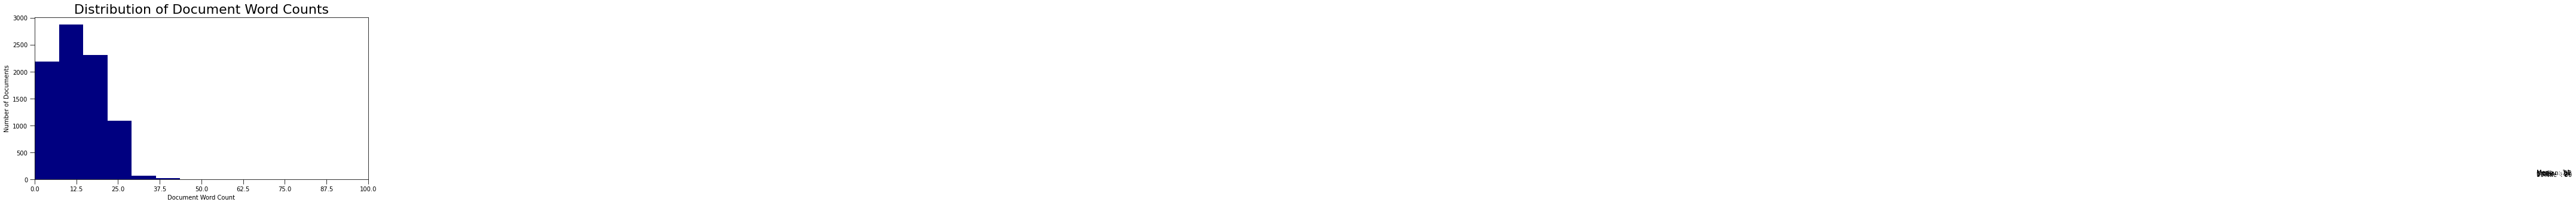

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

doc_lens = [len(d) for d in df_dominant_topic.Text]
plt.rcParams['figure.figsize'] = [10, 5]
# Plot
# plt.figure(figsize=(16,7), dpi=160)
plt.hist(doc_lens, bins = 100, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=8)
plt.xticks(np.linspace(0,100,9))
# f.set_figwidth(16)
# f.set_figheight(4)
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

<ipython-input-55-40184154b22a>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
<ipython-input-55-40184154b22a>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
<ipython-input-55-40184154b22a>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
<ipython-input-55-40184154b22a>:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=False`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(doc_lens, col

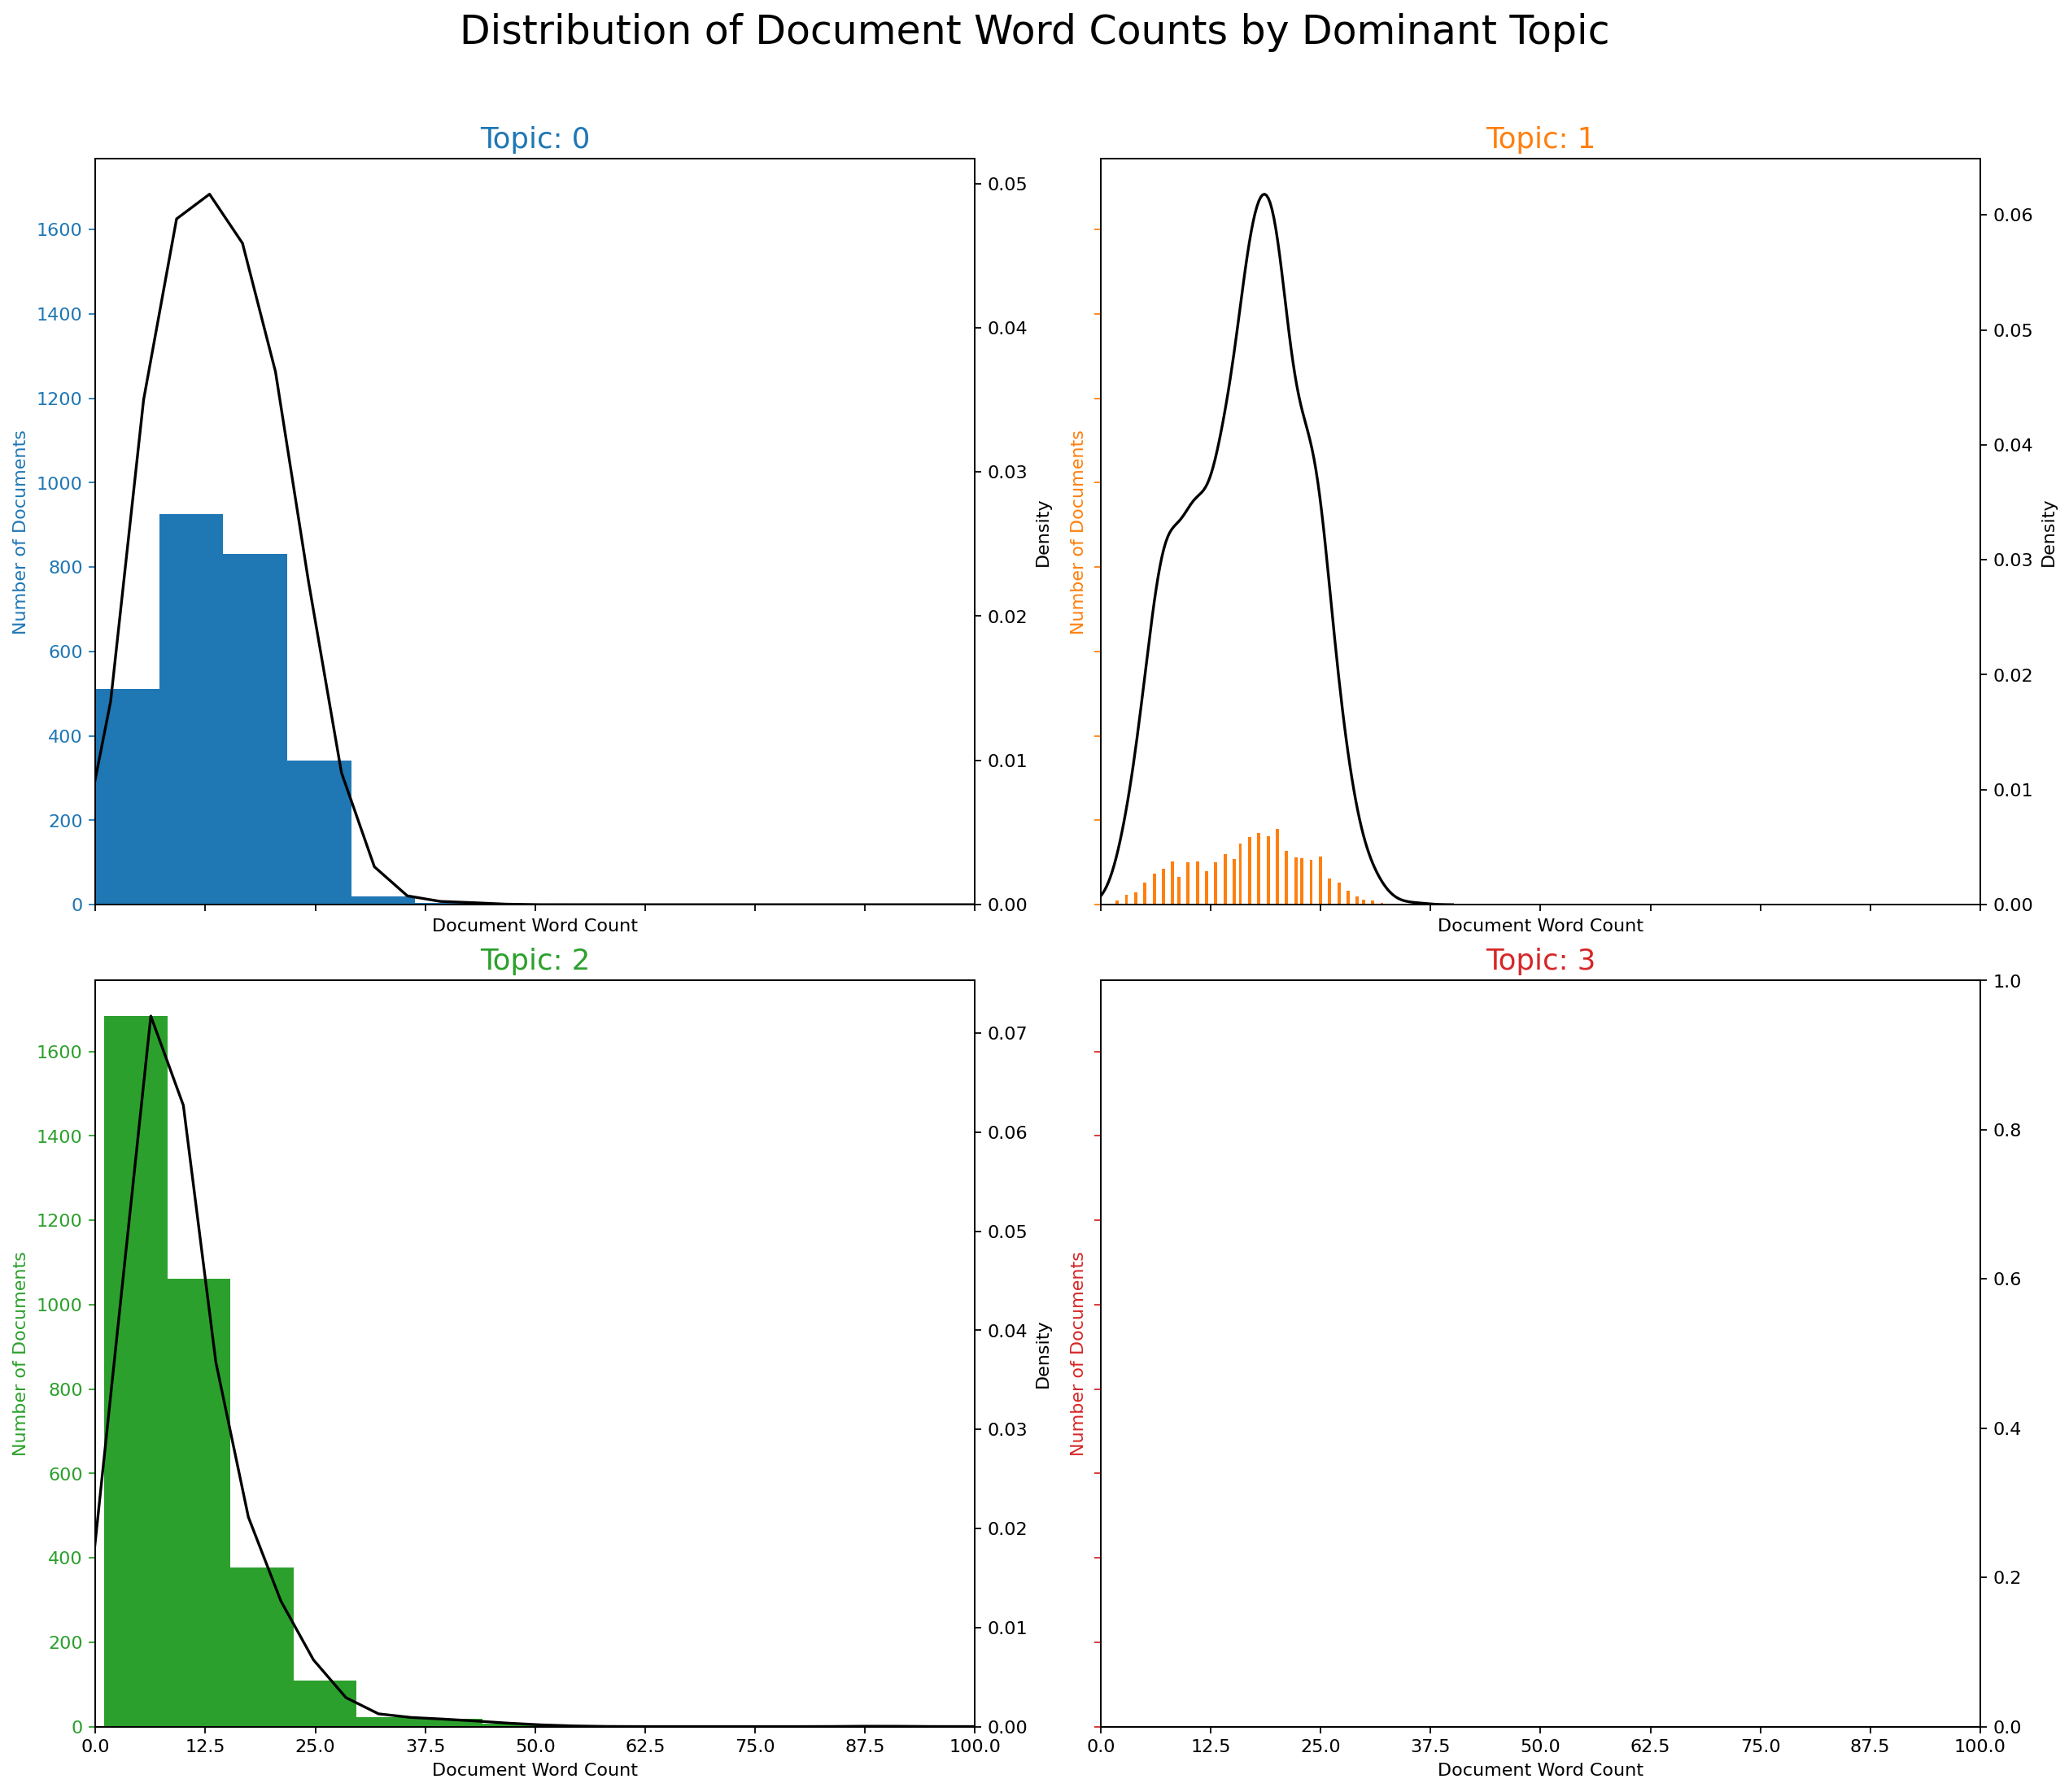

In [ ]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 100, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 100), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,100,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

<ipython-input-56-a81b6a30a174>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


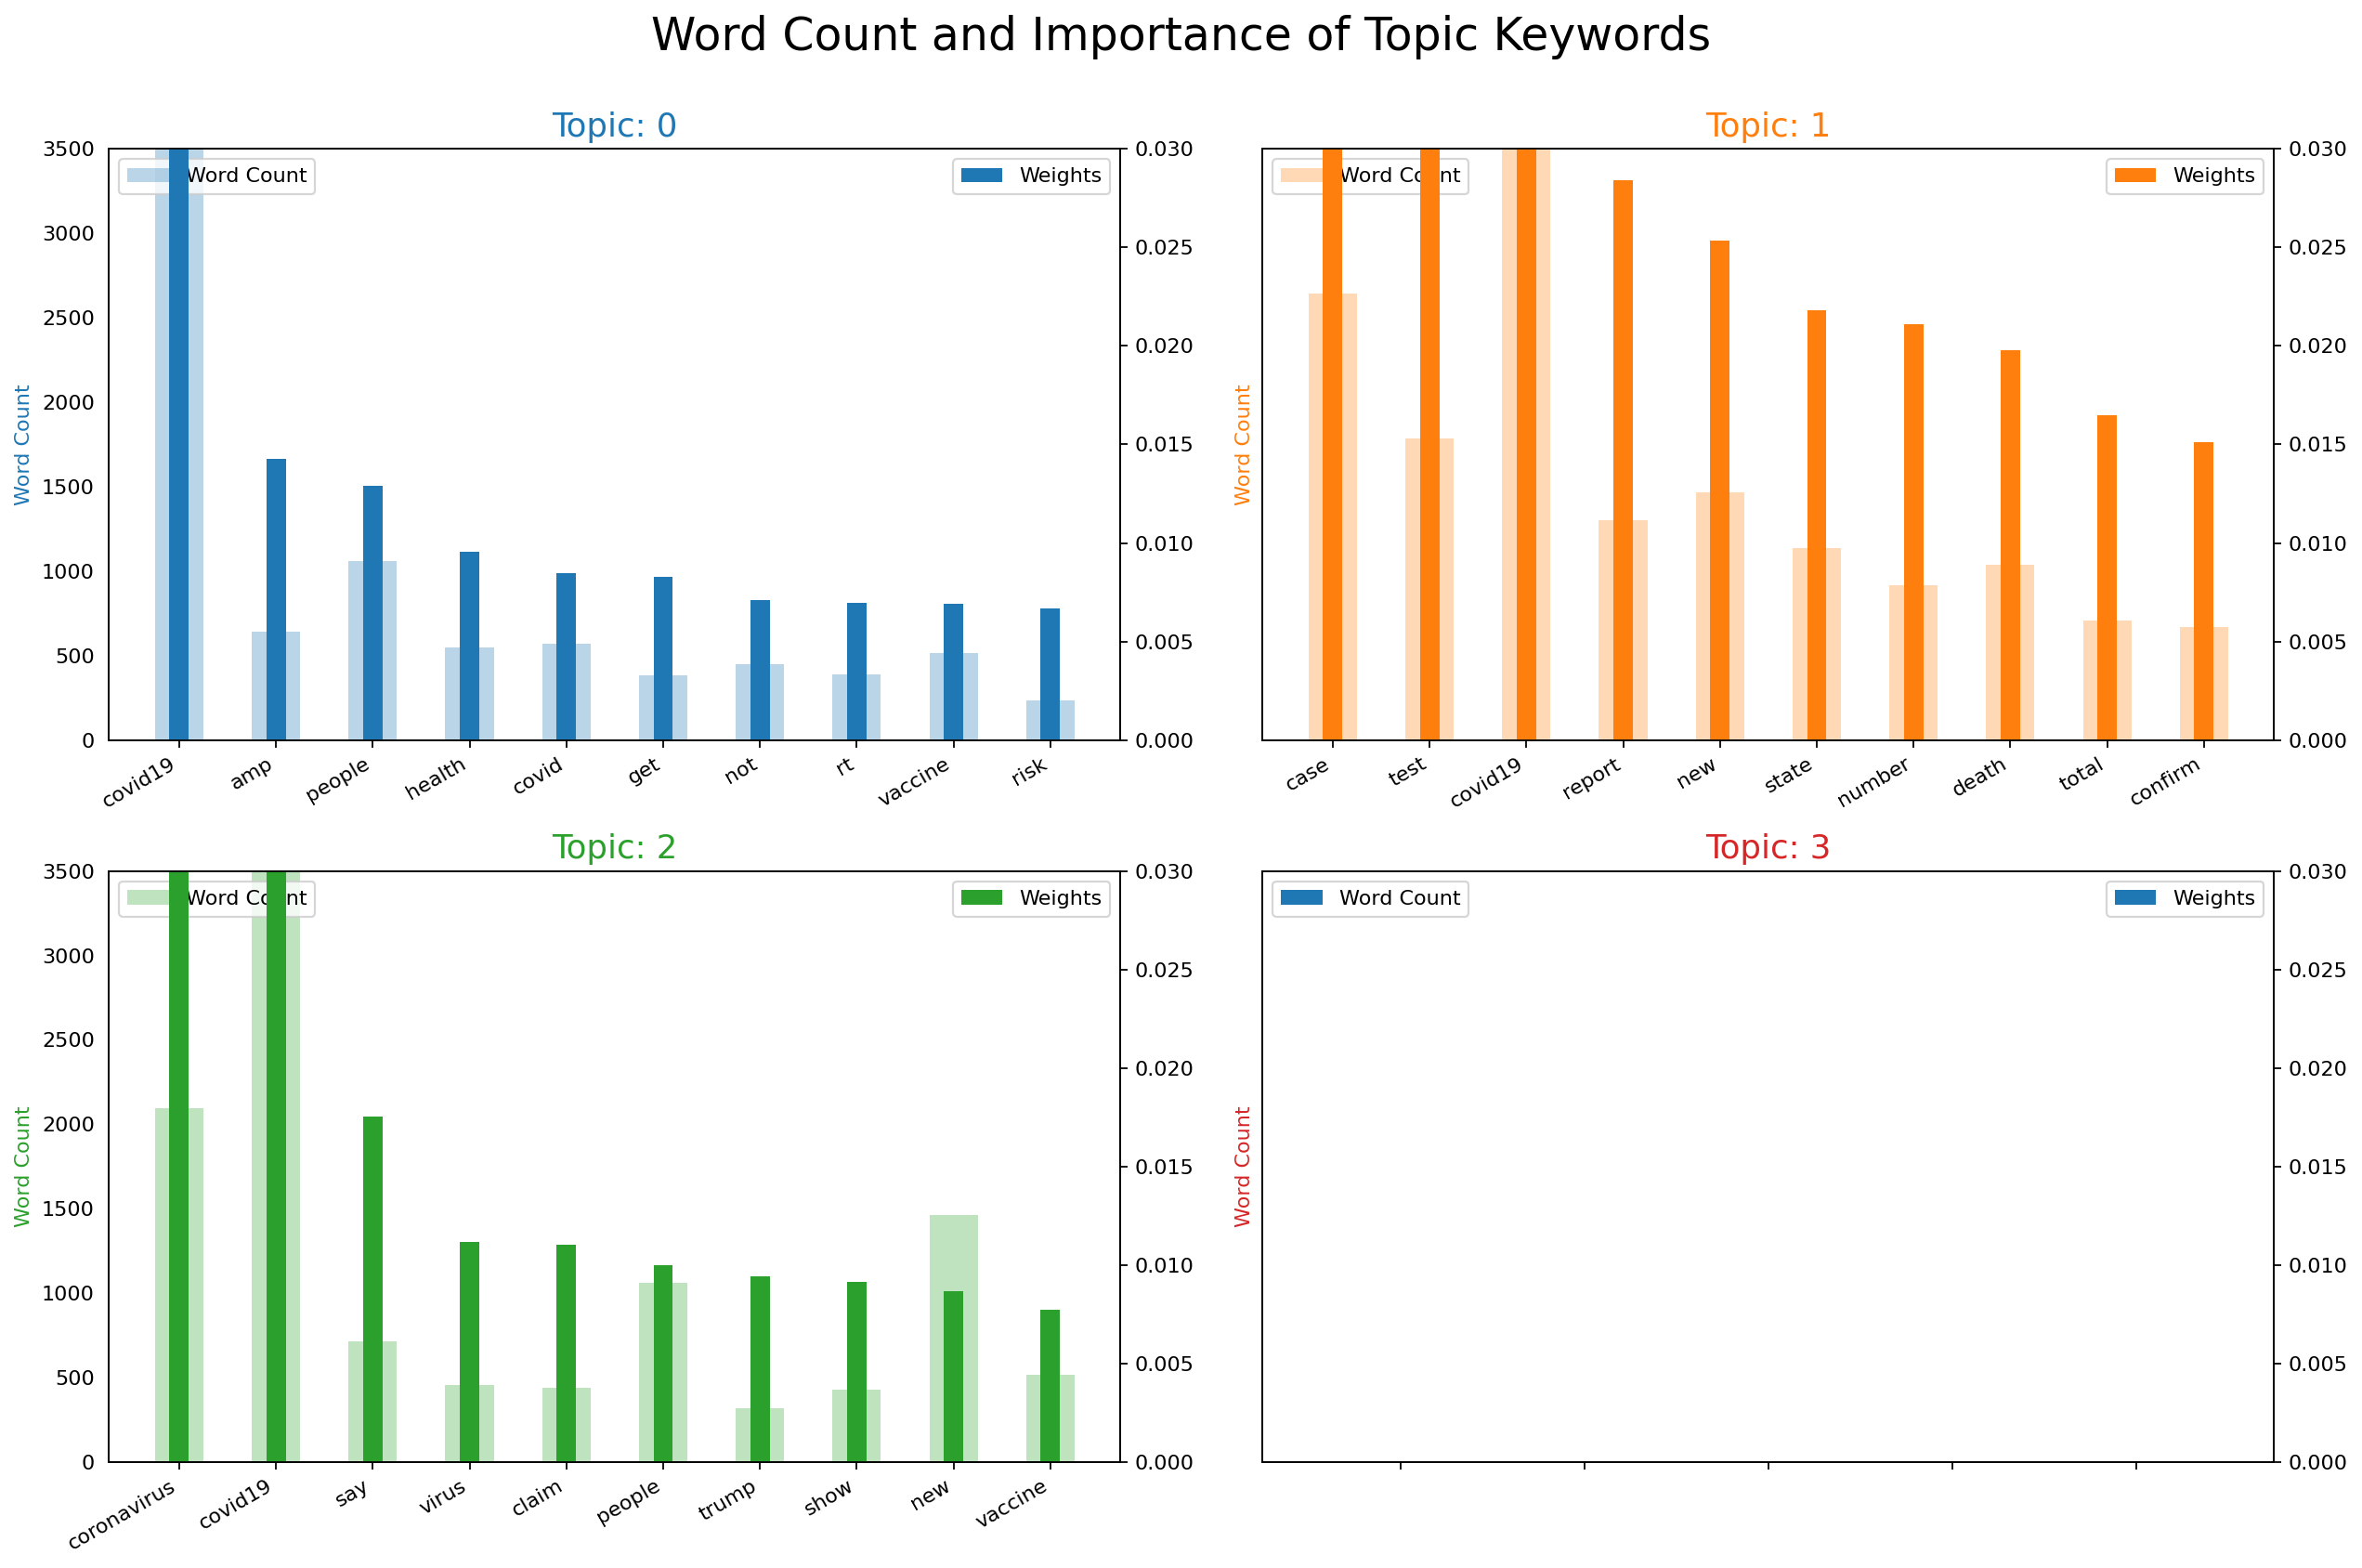

In [ ]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in clean_list for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [ ]:
# Sentence Coloring of N Sentences
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

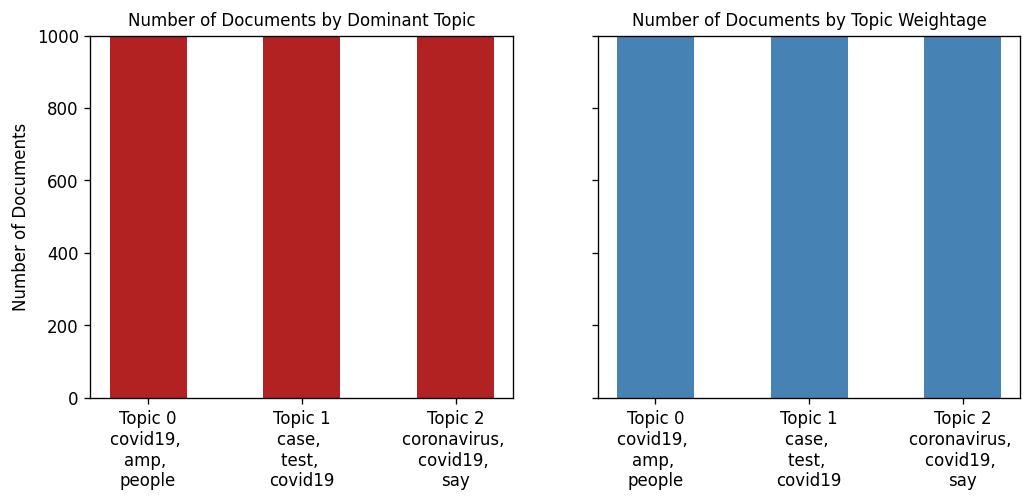

In [ ]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [ ]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 3
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 8554 samples in 0.005s...
[t-SNE] Computed neighbors for 8554 samples in 0.131s...
[t-SNE] Computed conditional probabilities for sample 1000 / 8554
[t-SNE] Computed conditional probabilities for sample 2000 / 8554
[t-SNE] Computed conditional probabilities for sample 3000 / 8554
[t-SNE] Computed conditional probabilities for sample 4000 / 8554
[t-SNE] Computed conditional probabilities for sample 5000 / 8554
[t-SNE] Computed conditional probabilities for sample 6000 / 8554
[t-SNE] Computed conditional probabilities for sample 7000 / 8554
[t-SNE] Computed conditional probabilities for sample 8000 / 8554
[t-SNE] Computed conditional probabilities for sample 8554 / 8554
[t-SNE] Mean sigma: 0.001146
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.716888
[t-SNE] KL divergence after 1000 iterations: 0.668198


In [ ]:
# DEFINE FUNCTION TO CALCULATE SENTIMENT SCORE 
def sentimentScore(sentences):
    analyzer = SentimentIntensityAnalyzer()
    results = []
    for sentence in sentences:
        vs = analyzer.polarity_scores(sentence)
        print(str(vs))
        results.append(vs) 
    return results
sentiment = sentimentScore(df['new_tweet'])

Streaming output truncated to the last 5000 lines.
{'neg': 0.0, 'neu': 0.859, 'pos': 0.141, 'compound': 0.3182}
{'neg': 0.162, 'neu': 0.838, 'pos': 0.0, 'compound': -0.4019}
{'neg': 0.106, 'neu': 0.848, 'pos': 0.046, 'compound': -0.4019}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.682, 'pos': 0.318, 'compound': 0.4215}
{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.3182}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.909, 'pos': 0.091, 'compound': 0.3182}
{'neg': 0.101, 'neu': 0.899, 'pos': 0.0, 'compound': -0.4019}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.404, 'neu': 0.512, 'pos': 0.084, 'compound': -0.8625}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.725, 'pos': 0.275, 'compound': 0.6908}
{'neg': 0.101, 'neu': 0.784, 'pos': 0.116, 'compound': 0.1027}
{'neg

In [ ]:
sentiment_df = pd.DataFrame(sentiment)
df.index = sentiment_df.index

In [ ]:
df = pd.concat([df, sentiment_df], axis=1)

In [ ]:
df

,id,tweet,label,neg,neu,pos,compound
0,1,The CDC currently reports 99031 deaths. In gen...,real,0.408,0.592,0.000,-0.9136
1,2,States reported 1121 deaths a small rise from ...,real,0.394,0.606,0.000,-0.8316
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake,0.000,0.921,0.079,0.0094
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real,0.000,1.000,0.000,0.0000
4,5,Populous states can generate large case counts...,real,0.000,1.000,0.000,0.0000
...,...,...,...,...,...,...,...
8555,2136,#CoronaVirusUpdates: State-wise details of Tot...,real,0.000,1.000,0.000,0.0000
8556,2137,Tonight 12(midnight) onwards Disaster Manageme...,fake,0.285,0.588,0.127,-0.7269
8557,2138,296 new cases of #COVID19Nigeria; Plateau-85 E...,real,0.122,0.878,0.000,-0.5994
8558,2139,RT @CDCemergency: #DYK? @CDCgov’s One-Stop Sho...,real,0.000,1.000,0.000,0.0000


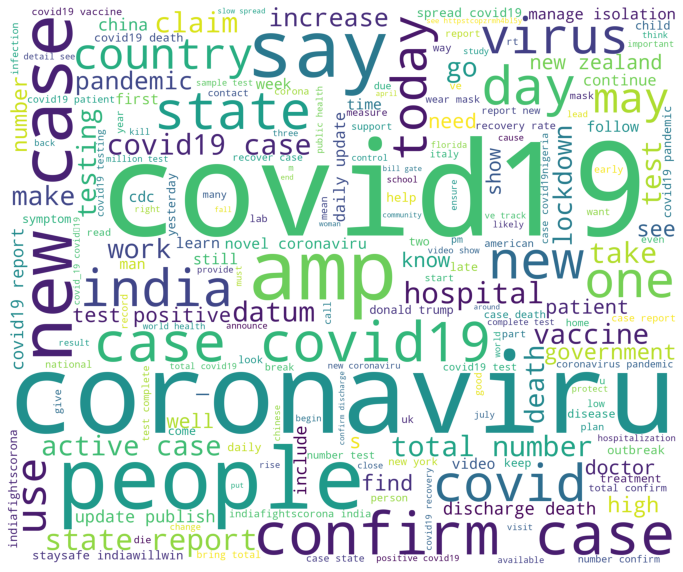

In [ ]:
corpus_cloud = ' '.join(df['new_tweet'])
STOPWORDS.update(['PRON','would','also','’s'])
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',width=2400,height=2000).generate(corpus_cloud)
plt.figure(figsize=(12,15))
plt.imshow(wordcloud)
plt.axis('off')

plt.savefig("wordcloud.jpg")
plt.show()

In [ ]:
!pip install text2emotion

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import text2emotion as te

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
!pip install emoji==1.6.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# DEFINE FUNCTION TO CALCULATE EMOTION SCORE 
def emotionScore(sentences):
    results = []
    for sentence in sentences:
        vs = te.get_emotion(sentence)
        print(str(vs))
        results.append(vs) 
    return results
emotions = emotionScore(df['tweet'])

Streaming output truncated to the last 5000 lines.
{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.5, 'Fear': 0.5}
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.17, 'Sad': 0.17, 'Fear': 0.67}
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.67, 'Sad': 0.33, 'Fear': 0.0}
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 1.0}
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, 'Sad': 0.0, 'Fear': 0.0}
{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 1.0, 'Sad': 0.0, 'Fear': 0.0}
{'Happy': 0.17, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.33, 'Fear': 0.5}
{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad': 0, 'Fear': 0}
{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.67, 'Sad': 0.0, 'Fear': 0.0}
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.33, 'Sad': 0.33, 'Fear': 0.33}
{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0

In [ ]:
emotions_df = pd.DataFrame(emotions)
df.index = emotions_df.index

In [ ]:
df = pd.concat([df, emotions_df], axis=1)

In [ ]:
# emotion features added twice -- removing duplicates
# df = df.T.drop_duplicates().T

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/tweets_sentiment_emotions.csv')

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
y = df[['label']]

In [ ]:
import numpy as np

In [ ]:
y = np.ravel(y)

In [ ]:
y = le.fit_transform(y)

In [ ]:
X = df.drop(columns=['id', 'tweet', 'label', 'new_tweet'])
# X = df.drop(columns=['id', 'tweet', 'label'])

In [ ]:
X

,neg,neu,pos,compound,Happy,Angry,Surprise,Sad,Fear
0,0.408,0.592,0.000,-0.9136,0.0,0.0,0.0,0.00,1.00
1,0.394,0.606,0.000,-0.8316,0.0,0.0,0.0,0.50,0.50
2,0.000,0.921,0.079,0.0094,0.0,0.0,0.0,1.00,0.00
3,0.000,1.000,0.000,0.0000,0.0,0.0,0.0,0.00,0.00
4,0.000,1.000,0.000,0.0000,0.0,0.0,0.0,0.67,0.33
...,...,...,...,...,...,...,...,...,...
8555,0.000,1.000,0.000,0.0000,0.0,0.0,0.0,0.38,0.62
8556,0.285,0.588,0.127,-0.7269,0.0,0.0,0.0,0.50,0.50
8557,0.122,0.878,0.000,-0.5994,0.0,0.0,0.0,0.00,1.00
8558,0.000,1.000,0.000,0.0000,0.0,1.0,0.0,0.00,0.00


In [ ]:
from imodels.discretization import SimpleDiscretizer

In [ ]:
est = SimpleDiscretizer()

In [ ]:
def hot_encode(x):
    if(x< .2):
        return 0
    if(x>= .2):
        return 1

In [ ]:
X_encoded = X.applymap(hot_encode)

In [ ]:
y.shape

(8560,)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=.33, random_state=42)

In [ ]:
X_train.shape

(5735, 9)

In [ ]:
!pip install imodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.5/195.5 KB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 31.9 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
from imodels.rule_list import bayesian_rule_list

In [ ]:
bayes = bayesian_rule_list.bayesian_rule_list.BayesianRuleListClassifier(minsupport=.1, class1label='Real')

In [ ]:
feature_names = ['neg', 'neu', 'pos', 'compound', 'Happy', 'Angry', 'Surprise', 'Sad', 'Fear']

In [ ]:
X_train

,neg,neu,pos,compound,Happy,Angry,Surprise,Sad,Fear
7549,0,1,0,0,0,0,0,0,1
452,0,1,0,0,0,0,0,0,0
5856,0,1,0,1,0,0,0,1,1
5192,1,1,0,0,0,0,0,0,1
3625,0,1,0,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...
5734,0,1,0,0,0,0,1,0,0
5191,0,1,1,1,1,0,0,0,1
5390,0,1,0,0,0,1,0,0,1
860,0,1,0,0,0,0,0,0,0


In [ ]:
bayes.fit(X_train, y_train, feature_names=feature_names)

/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Trained RuleListClassifier for detecting Real
==============================================
IF Fear > 0.5 and Surprise > 0.5 THEN probability of Real: 45.1% (41.8%-48.5%)
ELSE IF Fear > 0.5 and Sad > 0.5 THEN probability of Real: 74.3% (71.9%-76.7%)
ELSE IF Fear > 0.5 and Happy > 0.5 THEN probability of Real: 68.1% (62.8%-73.2%)
ELSE IF Fear > 0.5 and neg > 0.5 THEN probability of Real: 38.0% (32.2%-44.0%)
ELSE IF Fear > 0.5 and pos > 0.5 THEN probability of Real: 58.8% (51.7%-65.8%)
ELSE IF neg > 0.5 THEN probability of Real: 17.2% (13.7%-20.9%)
ELSE IF Sad > 0.5 THEN probability of Real: 53.4% (49.2%-57.5%)
ELSE IF pos > 0.5 THEN probability of Real: 28.6% (23.3%-34.3%)
ELSE IF compound > 0.5 THEN probability of Real: 69.6% (64.3%-74.7%)
ELSE IF Fear > 0.5 THEN probability of Real: 55.5% (51.6%-59.4%)
ELSE IF Happy > 0.5 THEN probability of Real: 58.7% (47.4%-69.5%)
ELSE probability of Real: 31.7% (28.1%-35.4%)
=============================================

In [ ]:
y_pred = bayes.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
accuracy_score(y_test, y_pred)

0.5260176991150443

In [ ]:
confusion_matrix(y_test, y_pred)

array([[   0, 1339],
       [   0, 1486]])

In [ ]:
from imodels import C45TreeClassifier

In [ ]:
tree = C45TreeClassifier()

In [ ]:
tree.fit(X_train, y_train)

C45TreeClassifier()

In [ ]:
y_pred = tree.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6672566371681415

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 775,  564],
       [ 376, 1110]])

In [ ]:
from imodels import RuleFitClassifier

In [ ]:
rule_fit = RuleFitClassifier(tree_size=10, max_rules=50)

In [ ]:
rule_fit.fit(X_train, y_train)

RuleFitClassifier(max_rules=50, tree_size=10)

In [ ]:
y_pred = rule_fit.predict(X_test)

In [ ]:
accuracy_score(y_test, y_pred)

0.6130973451327434

In [ ]:
rule_fit.visualize()

,rule,coef
0,neg,-0.28
2,pos,-0.03
3,compound,0.01
4,Happy,0.27
6,Surprise,-0.05
28,neg <= 0.5,0.02
29,Surprise <= 0.5,0.09
24,compound <= 0.5,-0.13
31,Surprise <= 0.5 and Fear > 0.5,0.62
18,compound <= 0.5 and Sad <= 0.5,-0.06


In [ ]:
confusion_matrix(y_test, y_pred)

array([[1138,  201],
       [ 892,  594]])